# Spectral Techniques 

Again we are going to be solving 

> ### $ \frac{\partial c}{\partial t} = D \frac{\partial ^ 2c}{\partial x^2} $

This time we are going to be using Fourier Transformations while doing it. 

Here basically we transform x vector in the expression for c(x,t) into k domain, which is also known as wave vector of reciprocal space. 

We are going to the Discrete Fourier Transformation (DFT) Algorithm for the most efficient computation here. 

The finally expression that we would need to implement in our code is :

> ### $ cft^{ t + \Delta t}  = \frac {cft ^{t}} { 1 + Dk^2 \Delta t} $ 

where
> cft = fourier tranform of c

> D   = Diffusivity

This equation is known as the Spectral Technique. 

Also Fourier Transformations imply Periodic Boundary Conditions which will be in terms of k. 


In [1]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt

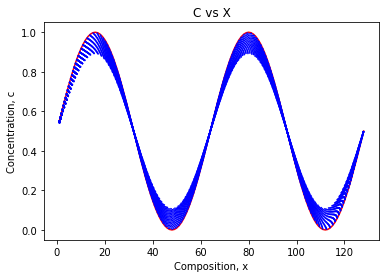

In [2]:
# ----- Defining Parameters ----- #

N = 128 # grid spaces
D = 1.0
dt = 1.0
x = np.zeros(N) # composition vector
for i in  range (0, N):
    x[i] = i+1

M = 2.0 # no. of wavelengths included in the domain

c = np.zeros(N) # concentration vector

for j in range(0, N):
    c[j] = 0.5 * (1 + np.sin(2 * np.pi * M * (j+1) / N)) # sinusoidal concentration profile

plt.plot(x,c, color = "red") # initial plot 


halfN = N/2 # half the no. of grid spaces

delk = 2 * np.pi / N # wave vector

ctilde = np.zeros(N) # F.T of concentration vector

# ------------- Loops -------------- #

for k in range (0,40): # no. of firgures to be plotted
    for m in range (0,500): # no. of timesteps
        
        ctilde = np.fft.fft(c) # invoking F.T
        
        # Implementation of PBC 
        for i in range (0, N):
            
           if ( i < halfN) :
               k = i * delk
           if ( i >= halfN) :
               k = (i-N+1) * delk
           # implementation of spectral technique
           ctilde[i]= ctilde[i] / ( 1 + D * (k**2) * dt)
    
    c = np.real(np.fft.ifft(ctilde)) # taking inverse F.T
    plt.plot(x,c, color = "blue", linestyle = "dotted")
    plt.xlabel ("Composition, x")
    plt.ylabel ("Concentration, c")
    plt.title ("C vs X")

As we can see in the plot, wherever the curvature is positive, that region is going to increase and wherever the curvature is negative, that region is going to decrease.

Thus, the system will go towards homogenization. 